In [354]:
import   numpy                       as  np
import   pandas                      as  pd
import   matplotlib.pyplot           as  plt
import   seaborn                     as  sns
%matplotlib inline
import   scipy.stats                 as stats
import   statsmodels.formula.api     as sm
from     scipy.stats       import    zscore
from     statsmodels.api   import    add_constant
from     sklearn           import    metrics
from     sklearn.tree      import    DecisionTreeClassifier
from     sklearn           import    metrics,tree
from     sklearn.model_selection import train_test_split
from     IPython.display   import    Image
from     os                import    system
from     sklearn.model_selection import GridSearchCV
from     sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from     sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import warnings
import sklearn
import scipy
import json
import sys
import csv
import os

In [355]:
house_tt=pd.read_csv('train_HousePrice.csv')
r1=house_tt.shape
house_tt.head()
print(r1)
house_tt.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [356]:
house_ts=pd.read_csv('test_HousePrice.csv')

#house_ts['SalePrice']=-999
r2=house_ts.shape

print(r2)
house_ts.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [357]:
train_id=house_tt['Id'].copy()
test_id=house_ts['Id'].copy()

In [358]:
house=pd.concat((house_tt.loc[:,'MSSubClass':'SaleCondition'],
                      house_ts.loc[:,'MSSubClass':'SaleCondition']))
house.shape

(2919, 79)

In [359]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [360]:
type(house_tt),type(house_ts)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [361]:

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


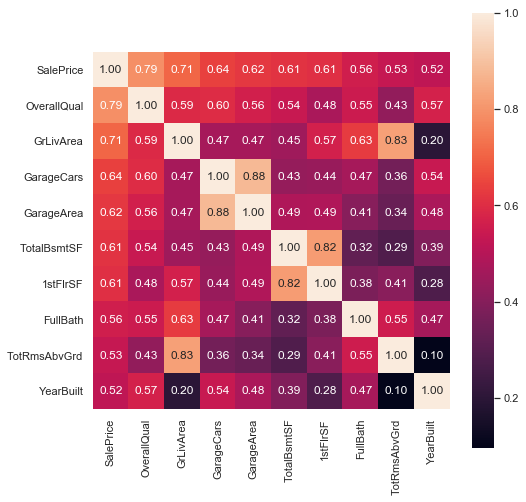

In [362]:

plt.figure(figsize=[8,8])
corrmat = house_tt.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_tt[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [363]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

# Finding the missing data count

In [364]:
# Finding the missing data count 
total = house_tt.isnull().sum().sort_values(ascending=False)
percent = (house_tt.isnull().sum()/house_tt.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [365]:
# missing value treatment
house_tt = house_tt.drop((missing_data[missing_data['Total'] > 1]).index,1)
house_tt = house_tt.drop(house_tt.loc[house_tt['Electrical'].isnull()].index)
house_tt.isnull().sum().max() #just checking that there's no missing data missing.

0

In [366]:
house_tt.isnull().sum().sort_values(ascending=False).head(20)


SalePrice       0
OverallQual     0
BsmtUnfSF       0
BsmtFinSF2      0
BsmtFinSF1      0
Foundation      0
ExterCond       0
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
RoofStyle       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
HouseStyle      0
Heating         0
BldgType        0
Condition2      0
Condition1      0
dtype: int64

# histogram and normal probability plot

# Outlier Detection

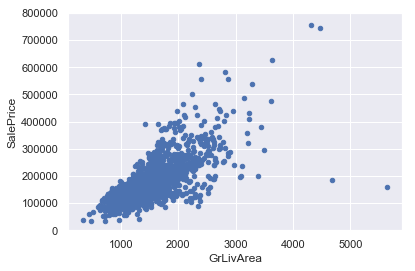

In [367]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([house_tt['SalePrice'], house_tt[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [368]:
#deleting points that are outliers
house_tt.sort_values(by = 'GrLivArea', ascending = False)[:4]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
1182,1183,60,RL,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,555,0,7,2007,WD,Abnorml,745000
691,692,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2007,WD,Normal,755000


In [369]:
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 1299].index)
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 692].index)
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 1183].index)
house_tt = house_tt.drop(house_tt[house_tt['Id'] == 524].index)

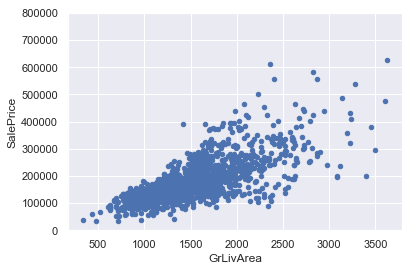

In [370]:
var = 'GrLivArea'
data = pd.concat([house_tt['SalePrice'], house_tt[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

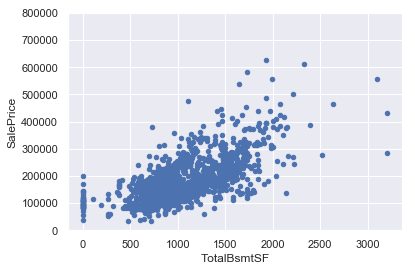

In [371]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([house_tt['SalePrice'], house_tt[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [372]:
house_tt.TotalBsmtSF.sort_values(ascending = False)[:10]

332     3206
496     3200
440     3094
1373    2633
1044    2524
224     2392
898     2330
70      2223
888     2217
178     2216
Name: TotalBsmtSF, dtype: int64

In [373]:
house_tt.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [374]:
'''#log transform skewed numeric features:
numeric_feats = house_tt.dtypes[house_tt.dtypes != "object"].index
skewed_feats = house_tt[numeric_feats].apply(lambda x: x.skew()) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

house_tt[skewed_feats] = np.log1p(house_tt[skewed_feats])
house_tt.head()'''

'#log transform skewed numeric features:\nnumeric_feats = house_tt.dtypes[house_tt.dtypes != "object"].index\nskewed_feats = house_tt[numeric_feats].apply(lambda x: x.skew()) \nskewed_feats = skewed_feats[skewed_feats > 0.75]\nskewed_feats = skewed_feats.index\n\nhouse_tt[skewed_feats] = np.log1p(house_tt[skewed_feats])\nhouse_tt.head()'

In [375]:
house_tt.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [376]:
# Log transform the target for official scoring
#The key point is to to log_transform the numeric variables since most of them are skewed.
#house_tt.SalePrice = np.log1p(house_tt.SalePrice)


In [377]:
df=house_tt[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars', 'YearBuilt','SalePrice']]
df=pd.get_dummies(df)
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt,SalePrice
0,7,1710,856,2,2003,208500
1,6,1262,1262,2,1976,181500
2,7,1786,920,2,2001,223500
3,7,1717,756,3,1915,140000
4,8,2198,1145,3,2000,250000


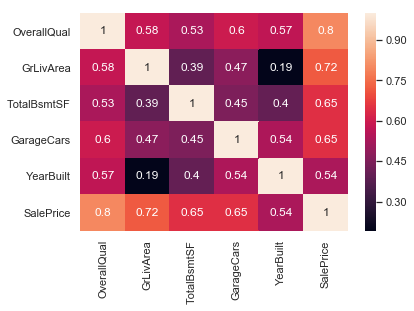

In [378]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [379]:
x=house_tt[['OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt']]
x.columns
y=house_tt['SalePrice']
x.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt
0,7,1710,856,2,2003
1,6,1262,1262,2,1976
2,7,1786,920,2,2001
3,7,1717,756,3,1915
4,8,2198,1145,3,2000


In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif['VIF val']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']=x.columns
vif.round(1)

,VIF val,Features
0,45.0,OverallQual
1,16.1,GrLivArea
2,11.0,TotalBsmtSF
3,11.0,GarageCars
4,22.9,YearBuilt


In [381]:
house_ts=house_ts[['Id','OverallQual','GrLivArea','TotalBsmtSF','GarageCars','YearBuilt']]


In [382]:
house_ts.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
TotalBsmtSF    1
GarageCars     1
YearBuilt      0
dtype: int64

In [383]:
house_ts[house_ts.TotalBsmtSF.isnull()]

,Id,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt
660,2121,4,896,NaN,1.0,1946


In [384]:
house_ts.TotalBsmtSF.fillna(house_ts.TotalBsmtSF.median(),inplace=True)

In [385]:
house_ts[house_ts.TotalBsmtSF.isnull()]

,Id,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt


In [386]:
house_ts[house_ts.GarageCars.isnull()]

,Id,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,YearBuilt
1116,2577,5,1828,859.0,NaN,1923


In [387]:
house_ts.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
TotalBsmtSF    0
GarageCars     1
YearBuilt      0
dtype: int64

In [388]:
house_ts.GarageCars.fillna(house_ts.GarageCars.median(),inplace=True)

In [389]:
house_ts.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
TotalBsmtSF    0
GarageCars     0
YearBuilt      0
dtype: int64

In [390]:
house_ts.shape

(1459, 6)

In [391]:
hs=house_ts.drop('Id',axis=1)
hs.shape

(1459, 5)

In [392]:
x.shape

(1455, 5)

In [393]:
y.shape

(1455,)

In [394]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [395]:
x_train.shape

(1018, 5)

In [396]:
x_test.shape

(437, 5)

In [397]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
parameter_rf= {'n_estimators':np.arange(1,50),'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model=RandomForestRegressor(random_state=0)
parameter_dt = {'max_depth':np.arange(1,10)} 
# we are restricting the depth to 10 layers
model1=DecisionTreeRegressor(random_state=0)
parameter_kn = {'n_neighbors':np.arange(1,15)} 
# we are restricting the depth to 10 layers
model2=neighbors.KNeighborsRegressor(weights='uniform',metric='euclidean')


In [398]:
GS_dt= GridSearchCV(model1,parameter_dt,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_dt.fit(x,y)
print(GS_dt.best_params_)

{'max_depth': 6}


In [399]:
GS_kn= GridSearchCV(model2,parameter_kn,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_kn.fit(x,y)
print(GS_kn.best_params_)

{'n_neighbors': 12}


In [400]:
'''GS_rf= GridSearchCV(model,parameter_rf,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters
GS_rf.fit(x,y)
print(GS_rf.best_params_)'''


'GS_rf= GridSearchCV(model,parameter_rf,cv=5) # we give the model created  above inside the GridSearch to give best number of Parameters\nGS_rf.fit(x,y)\nprint(GS_rf.best_params_)'

In [401]:
DT_model=DecisionTreeRegressor(max_depth=7,random_state=0)
DT_model.fit(x,y)
pred1=DT_model.predict(hs)
Rf_model=RandomForestRegressor(n_estimators=49,max_depth=8,random_state=0)
Rf_model.fit(x,y)
pred2=Rf_model.predict(hs)
Lr_model=LinearRegression()
Lr_model.fit(x,y)
pred4=Lr_model.predict(hs)
Kn_model=neighbors.KNeighborsRegressor(n_neighbors=12,weights='uniform',metric='euclidean')
Kn_model.fit(x,y)
pred5=Kn_model.predict(hs)

In [ ]:
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg='%s:%f(%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)

RMSE Score  for Decision Tree is 35781.090764 and R2 value is 0.918177 
RMSE Score  for Random Forest is 29003.572521 and R2 value is 0.944702 
RMSE Score  for Logistic Regression is 33425.762176 and R2 value is 0.811536 
RMSE Score  for KNN is 40715.120092 and R2 value is 0.764444 


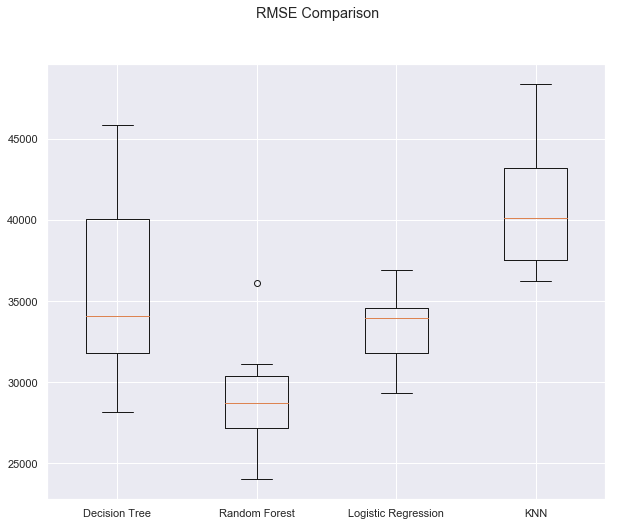

In [402]:
# kfold cross validation
mod=[]
mod.append(('Decision Tree',DT_model))
mod.append(('Random Forest',Rf_model))
#mod.append(('Naive Bayes',Nb_model))
mod.append(('Logistic Regression',Lr_model))
mod.append(('KNN',Kn_model))
result=[]
names=[]
#scoring='accuracy'
for name,model in mod:
    scores = cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    cv_results=model.score(x,y)
    result.append(rmse_scores)
    names.append(name)
    msg="RMSE Score  for %s is %f and R2 value is %f "%(name,rmse_scores.mean(),cv_results)
    print(msg)
# boxplot for the models
fig=plt.figure(figsize=[10,8])
fig.suptitle("RMSE Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


In [403]:
pred4.size

1459

In [404]:
hs.shape

(1459, 5)

In [409]:
from sklearn.xgboost import XGBRegressor

ModuleNotFoundError: No module named 'sklearn.xgboost'

In [407]:

def run_XGB_and_CV(traindf):
    xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)
    cv_score = cross_val_score(xgb_test, traindf.drop(['SalePrice','Id'], axis = 1), traindf['SalePrice'], cv = 5, n_jobs = -1)
    print('CV Score is: '+ str(np.mean(cv_score)))
xgb_test = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
run_XGB_and_CV(house_tt)

In [ ]:
xgb_test.fit(x, y)

In [ ]:
test_preds = xgb_test.predict(hs)

In [405]:
final=np.array(np.ravel(pred2))
print(final.shape)
ID=np.array(house_ts['Id'])
ID.shape
new=pd.DataFrame({'Id':ID,'SalePrice':final})
new.head()

(1459,)


,Id,SalePrice
0,1461,122466.228941
1,1462,142315.400348
2,1463,161749.809739
3,1464,179428.860492
4,1465,209106.569759


In [406]:
x=new.to_csv('SalesPrice_Prediction.csv',index=False)